In [7]:
import matplotlib.pyplot as plt
from scipy.signal import *
import numpy as np
import glob
import matplotlib.image as mpimg
import skimage.measure as measure
from PIL import Image

In [8]:
def gradient(image):
    sobelx = [[-1,0,1],[-2,0,2],[-1,0,1]]
    sobely = [[1,2,1],[0,0,0],[-1,-2,-1]]
    
    gx = convolve2d(image,sobelx, boundary='symm')
    gy = convolve2d(image,sobely, boundary='symm')
    
    M = (gx**2 + gy**2)**(1./2)
    
    return M

def extractNL(image):
    avg10 = (1. / 100)*np.ones([10,10])
    avgim = convolve2d(image,avg10,mode='same', boundary='symm')
    out = measure.find_contours(avgim,level = 128)
    #out = measure.find_contours(image,level = 128)
    return out

def NLmaskgen(contours,image):
    width = image.shape[0]
    height = image.shape[1]
    mask = np.zeros([height,width])
    for n,contour in enumerate(contours):
        #print n,contour
        for i in range(len(contour)):
            y = int(round(contour[i,1]))
            #print i,x
            x = int(round(contour[i,0]))
            mask[x,y] = 1.
    return mask

6142
4711
1.0 0.0


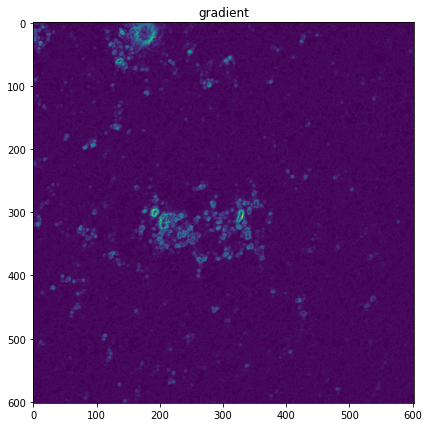

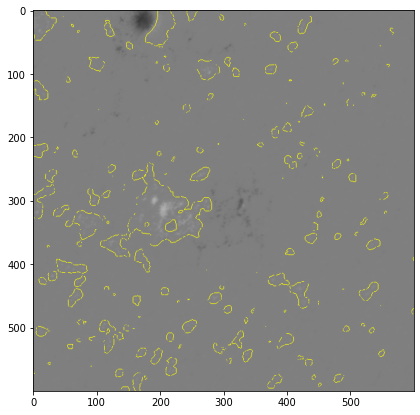

In [15]:
img=glob.glob('/home/zenalisa/data/1hem_210318/hmi/1807/*.tiff')
#print(img)
for m in img:
    mg=Image.open(m)
    mg=np.array(mg)
    #plt.figure(figsize=(7,7))
    #plt.imshow(mg, cmap='gray')
    #print(mg)
    
    grad=gradient(mg)
    
    plt.figure(figsize=(7,7))
    plt.imshow(grad)
    plt.title('gradient')
    
    #maybe a little schmear will help idk
    #it sorta seemed to?
    avg10 = (1. / 100)*np.ones([10,10])
    mg_blur= convolve2d(mg,avg10,mode='same', boundary='symm')
    grad_blur=gradient(mg_blur)
    
    #plt.figure(figsize=(7,7))
    #plt.imshow(grad_blur)
    #plt.title('gradient but blurred first')
    #print(grad)

    contours=extractNL(mg)
    #print(len(contours))
    nl_mask=NLmaskgen(contours,mg)*grad[1:-1,1:-1]
    #print(nl_mask.size)
    print(np.count_nonzero(nl_mask))
    nl_mask=nl_mask*grad[1:-1,1:-1]
    print(np.count_nonzero(nl_mask))
    
    #not sure this next line is entirely correct, but it'll do for now to make this a real mask
    nl_mask[nl_mask!=0.]=1.
    #t=1
    #print(nl_mask[nl_mask>t*np.amax(nl_mask)])
    mg=np.stack((mg,mg,mg), axis=-1)
    #print(mg.shape)
    plt.figure(figsize=(7,7))
    #print(np.amax(nl_mask), np.amin(nl_mask))
    #mg[nl_mask>t*np.amax(nl_mask)]=[255, 255, 0]
    mg[nl_mask==1.]=[255, 255, 0]
    plt.imshow(mg)
    break